## KPI 3: Índice de Modernización de Infraestructura de Internet

### Descripción
El objetivo de este KPI es medir el nivel de modernización en la infraestructura de internet en las distintas regiones del país. Se enfoca en comparar el uso de tecnologías avanzadas como la fibra óptica con tecnologías más tradicionales como ADSL o Cablemodem.

### Objetivo
Identificar qué regiones están adoptando tecnologías modernas a mayor velocidad y cuáles se encuentran rezagadas. Este análisis ayudará a priorizar inversiones en modernización tecnológica y reducir las disparidades regionales en la calidad del acceso a internet.

### Fórmula del KPI
Índice de Modernización = (Accesos mediante Fibra Óptica) / (Accesos mediante ADSL + Accesos mediante Cablemodem + Accesos mediante Fibra Óptica)

### Ejemplo
Si una región tiene 50,000 accesos mediante fibra óptica, 30,000 accesos mediante ADSL y 20,000 mediante Cablemodem, el índice de modernización sería:

Índice de Modernización = 50,000 / (50,000 + 30,000 + 20,000) = 0.5 (50%)

### Metodología
1. Cargar y visualizar el dataset procesado de accesos a internet.
2. Calcular los accesos por tipo de tecnología para cada región.
3. Derivar el índice de modernización de cada región.
4. Visualizar los resultados con gráficos para facilitar el análisis.

A continuación, cargaremos el dataset y verificaremos las primeras filas para asegurarnos de que los datos estén correctamente estructurados.


In [1]:
import pandas as pd

# Cargar el archivo Parquet de accesos a internet procesado
accesos_internet = pd.read_parquet('data/processed/internet_accesos_tecnologia.parquet')

# Mostrar las primeras filas del dataset para verificar la estructura
print("Accesos a Internet - Primeras filas:")
print(accesos_internet.head())


Accesos a Internet - Primeras filas:
    Año  Trimestre        Provincia    ADSL  Cablemodem  Fibra óptica  \
0  2019          2     Buenos Aires  214055     2722466       1849476   
1  2019          2  Capital Federal   54102     1144781        230402   
2  2019          2        Catamarca    4951       10303         58355   
3  2019          2            Chaco    9448       57935         68944   
4  2019          2           Chubut   25955       80704         26516   

   Wireless  Otros    Total  
0    138638  64745  4989380  
1      4493  29821  1463599  
2      1384     81    75074  
3      8407   2358   147092  
4     31118   9930   174223  


### Cálculo del Índice de Modernización de Infraestructura de Internet

En este paso, calcularemos el índice de modernización para cada provincia. Este índice se calcula dividiendo el número de accesos mediante fibra óptica entre el total de accesos mediante tecnologías fijas (ADSL, Cablemodem y Fibra Óptica). Un índice más alto indica una mayor proporción de accesos mediante tecnologías modernas (fibra óptica), lo cual refleja un mayor grado de modernización en la infraestructura de internet.

**Fórmula:**

Índice de Modernización = (Accesos mediante Fibra Óptica) / (Accesos mediante ADSL + Accesos mediante Cablemodem + Accesos mediante Fibra Óptica)

A continuación, realizamos el cálculo y mostramos los resultados para las primeras provincias.

In [2]:
# Calcular el índice de modernización para cada provincia
accesos_internet['Índice de Modernización'] = accesos_internet['Fibra óptica'] / (
    accesos_internet['ADSL'] + accesos_internet['Cablemodem'] + accesos_internet['Fibra óptica']
)

# Mostrar las primeras filas con el nuevo índice calculado
print("Índice de Modernización de Infraestructura - Primeras filas:")
print(accesos_internet[['Provincia', 'Fibra óptica', 'ADSL', 'Cablemodem', 'Índice de Modernización']].head())


Índice de Modernización de Infraestructura - Primeras filas:
         Provincia  Fibra óptica    ADSL  Cablemodem  Índice de Modernización
0     Buenos Aires       1849476  214055     2722466                 0.386435
1  Capital Federal        230402   54102     1144781                 0.161201
2        Catamarca         58355    4951       10303                 0.792770
3            Chaco         68944    9448       57935                 0.505725
4           Chubut         26516   25955       80704                 0.199106


### Agrupación del Índice de Modernización Promedio por Provincia

En este paso, agruparemos los datos por provincia para obtener el promedio del Índice de Modernización de Infraestructura de Internet en cada provincia a lo largo de los trimestres disponibles. Este promedio ayudará a identificar las provincias que han avanzado más en la implementación de tecnologías modernas, específicamente en el uso de fibra óptica como indicador de modernización.

**Cálculo:**

Para cada provincia, calcularemos el promedio del índice de modernización en todos los trimestres.

A continuación, agrupamos los datos y mostramos el resultado.


In [3]:
# Agrupar por provincia y calcular el promedio del Índice de Modernización
indice_modernizacion_provincia = accesos_internet.groupby('Provincia')['Índice de Modernización'].mean().reset_index()

# Ordenar los datos de mayor a menor índice de modernización
indice_modernizacion_provincia = indice_modernizacion_provincia.sort_values(by='Índice de Modernización', ascending=False)

# Mostrar los primeros resultados
print("Índice de Modernización Promedio por Provincia:")
print(indice_modernizacion_provincia.head())


Índice de Modernización Promedio por Provincia:
       Provincia  Índice de Modernización
3      Catamarca                 0.248529
24       Tucumán                 0.221700
13       Mendoza                 0.202287
1   Buenos Aires                 0.149480
11      La Pampa                 0.147049


## Distribución de Accesos por Tipo de Tecnología en cada Provincia

En este análisis, se busca visualizar cómo están distribuidos los accesos a internet por tipo de tecnología (ADSL, Cablemodem y Fibra Óptica) en cada provincia de Argentina. Este gráfico permite identificar las provincias con una mayor proporción de tecnologías modernas, como la fibra óptica, en comparación con tecnologías más antiguas como el ADSL.

**Objetivo del Gráfico**:
- Mostrar la proporción de cada tipo de tecnología en cada provincia.
- Identificar las provincias con una alta dependencia de tecnologías modernas.
- Resaltar las disparidades tecnológicas entre las provincias.

Se utilizará un gráfico de barras apiladas donde cada segmento representará un porcentaje de la tecnología utilizada en la provincia.


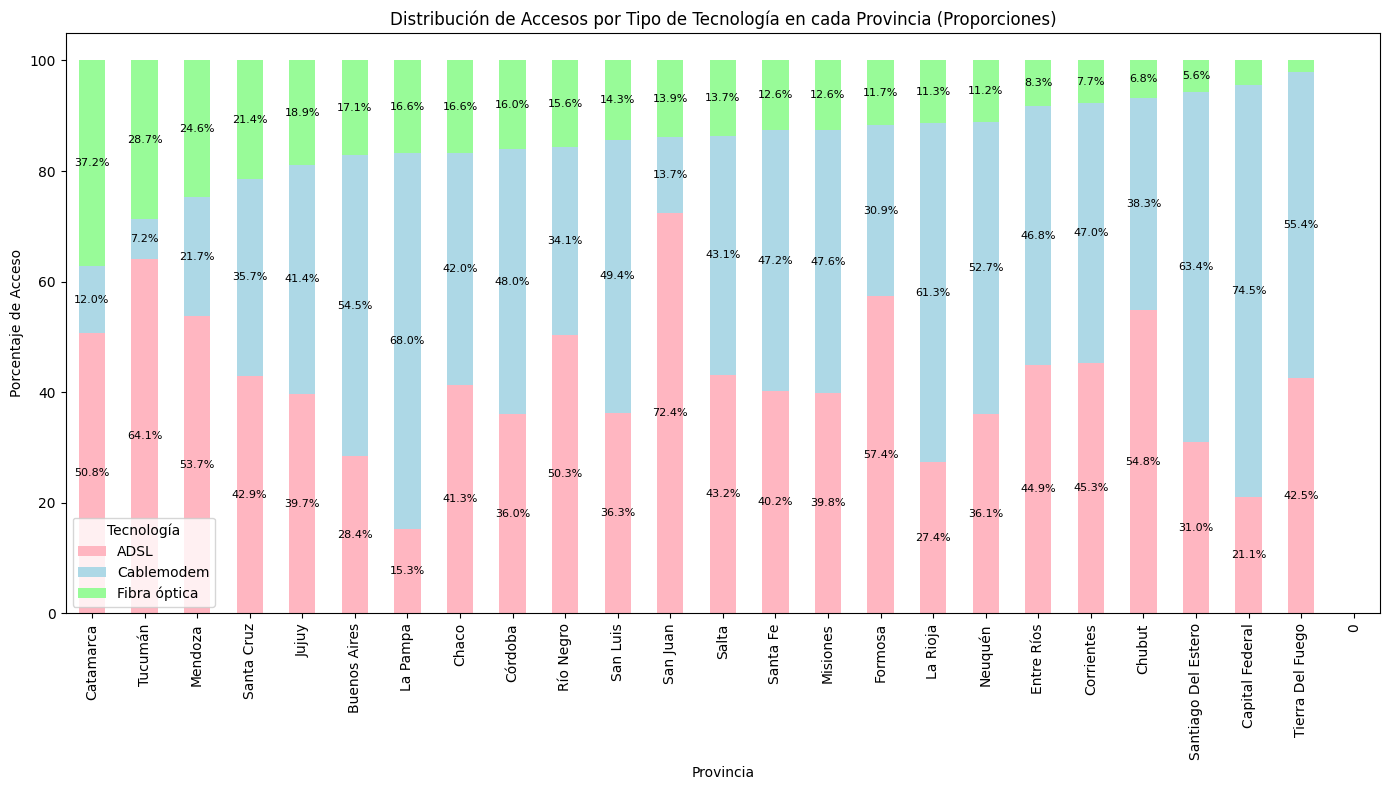

In [14]:
import matplotlib.pyplot as plt

# Calcular proporciones de cada tecnología en cada provincia
accesos_internet_provincia = accesos_internet.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica']].sum()
accesos_internet_provincia_percent = accesos_internet_provincia.div(accesos_internet_provincia.sum(axis=1), axis=0) * 100

# Ordenar por proporción de fibra óptica
accesos_internet_provincia_percent = accesos_internet_provincia_percent.sort_values(by='Fibra óptica', ascending=False)

# Colores claros para cada tecnología
colors = ['#FFB6C1', '#ADD8E6', '#98FB98']  # Rosa claro, Azul claro, Verde claro

# Configurar gráfico apilado con etiquetas de porcentaje
fig, ax = plt.subplots(figsize=(14, 8))
bars = accesos_internet_provincia_percent.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Añadir etiquetas de porcentaje para cada segmento de tecnología
for i, bar in enumerate(bars.patches):
    # Añadir etiqueta si el porcentaje es significativo
    if bar.get_height() > 5:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                f'{bar.get_height():.1f}%', ha='center', va='center', fontsize=8, color="black")

# Personalizar ejes y título
plt.xlabel('Provincia')
plt.ylabel('Porcentaje de Acceso')
plt.title('Distribución de Accesos por Tipo de Tecnología en cada Provincia (Proporciones)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Tecnología')
plt.show()


## Observaciones Clave del Gráfico de Distribución de Accesos

1. **Provincias con Mayor Uso de Fibra Óptica**:
   - **Catamarca**, **Tucumán**, y **Mendoza** destacan como las provincias con la mayor proporción de fibra óptica, lo que refleja un alto nivel de modernización de su infraestructura de internet.
   - Estas provincias presentan una proporción de fibra óptica superior al 20%, evidenciando un avance significativo hacia tecnologías modernas.

2. **Provincias con Mayor Dependencia de Tecnologías Antiguas**:
   - Provincias como **Tierra del Fuego**, **Capital Federal**, y **Santiago del Estero** tienen una baja proporción de fibra óptica y una mayor dependencia de tecnologías como el Cablemodem y ADSL.
   - Esto sugiere que estas provincias pueden requerir políticas públicas o inversiones privadas para modernizar sus infraestructuras.

3. **Tendencias Generales**:
   - En promedio, el Cablemodem domina como la tecnología más utilizada en la mayoría de las provincias, seguido por el ADSL.
   - Aunque la fibra óptica está creciendo en algunas provincias, todavía tiene un margen significativo de adopción en regiones con menor cobertura.

### Impacto en la Toma de Decisiones
- **Focalización de Inversiones**: Este análisis puede orientar las inversiones en infraestructura para priorizar las provincias con menor proporción de fibra óptica.
- **Promoción de la Equidad Digital**: Es crucial diseñar estrategias que reduzcan la brecha digital entre provincias con infraestructuras modernas y aquellas más rezagadas.

El gráfico de barras apiladas proporciona una perspectiva clara sobre el estado actual de la infraestructura de internet en cada provincia, resaltando las áreas con mayor oportunidad de mejora.
